# Moving Average Convergence Divergence(MACD)

5분 이동평균선 상향 돌파 Signal + 볼린저 밴드
총 시그널 발생 횟수: 0, 총 수익률: 0


/var/folders/qf/f467m8qs4rv1gpzcgr0nqbjm0000gn/T/ipykernel_78173/264450433.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if using_case["Close"][i]>using_case["UpperB"][i]:


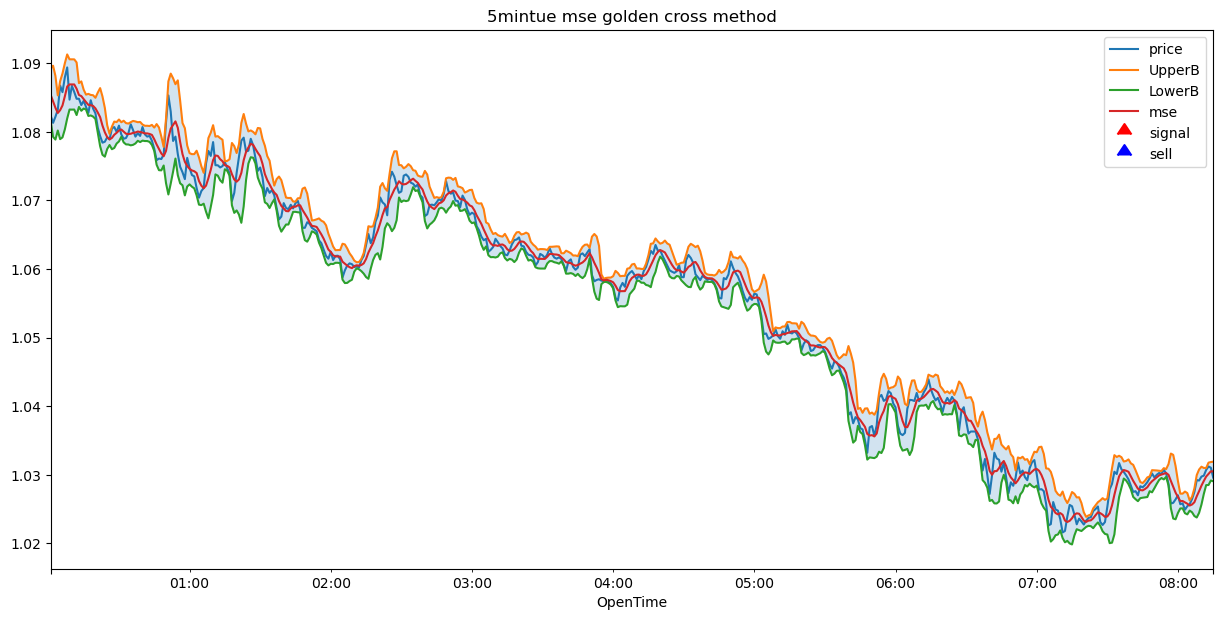

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
Ticker = 'JUP' #비트코인, 달러코인 페어
interval = '1m' # 1분봉
data=requests.get(f"https://fapi.binance.com/fapi/v1/markPriceKlines?symbol={Ticker}USDT&interval={interval}")
dic=json.loads(data.text)
df= pd.DataFrame(dic,columns=["OpenTime","Open","High","Low","Close","x","CloseTime","x2","x3","x3","x4","x5"])

df["OpenTime"] = pd.to_datetime(df['OpenTime'], unit='ms')
df.index = df["OpenTime"]
del df["OpenTime"]

using_case = pd.DataFrame(df["Close"])
using_case = using_case.astype('Float32')
#--------------------------------------------------------------------------------------------start
signal_i_list = []
signal_price_list = []
signal_return_list = []
signal_sell_list = []
sell_interval = 5
leverage = 5
trend = 1
k=2
#--------------------------------------------------------------------------------------------end

print(f"{sell_interval}분 ")

using_case_rolling=using_case.rolling(sell_interval).mean()
using_case_stddev = using_case.rolling(sell_interval).std()
using_case["UpperB"]= using_case_rolling + (using_case_stddev * k)
using_case["LowerB"]= using_case_rolling - (using_case_stddev * k)

for i in range(1,len(using_case)):
  if i < 1 or i > len(using_case) - sell_interval:
      continue
  prev_price = using_case["Close"].iloc[i-1]
  current_price = using_case["Close"].iloc[i]
  prev_mse = using_case_rolling["Close"].iloc[i-1]
  current_mse = using_case_rolling["Close"].iloc[i]
  
  if using_case["Close"][i]>using_case["UpperB"][i]:
      sell_date = using_case["Close"].iloc[i+sell_interval]
      수익률 = trend*(sell_date-current_price) / current_price*100*leverage
      print(f"  -  Signal 발생!  매수주가 {current_price:.3f}  ->  매도주가 {sell_date:.3f}  , 수익률 {수익률:.3f} %")
      #--------------------------------------------------------------------------------------------start
      signal_i_list.append(using_case.index[i])
      signal_price_list.append(current_price)
      signal_sell_list.append(sell_date)
      signal_return_list.append(수익률)
      #--------------------------------------------------------------------------------------------end

# result
print(f"총 시그널 발생 횟수: {len(signal_return_list)}, 총 수익률: {sum(signal_return_list)}")

# visoal raise
using_case["Close"][sell_interval:].plot(figsize=(15,7), label='price');
using_case['UpperB'][sell_interval:].plot(label='UpperB');
using_case['LowerB'][sell_interval:].plot(label='LowerB');
using_case_rolling["Close"][sell_interval:].plot(label='mse');
plt.scatter(x=signal_i_list, y=signal_price_list, marker=10, color='red', s=100 , label='signal');
plt.scatter(x=signal_i_list, y=signal_sell_list, marker=10, color='blue', s=100 , label='sell');
plt.fill_between(using_case.index[sell_interval:], using_case['UpperB'][sell_interval:], using_case['LowerB'][sell_interval:], alpha=0.2)
plt.title(f"{sell_interval}mintue mse golden cross method")
plt.legend();

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
Ticker = 'BTC' #비트코인, 달러코인 페어
interval = '1m' # 1분봉
data=requests.get(f"https://fapi.binance.com/fapi/v1/markPriceKlines?symbol={Ticker}USDT&interval={interval}")
dic=json.loads(data.text)
df= pd.DataFrame(dic,columns=["OpenTime","Open","High","Low","Close","x","CloseTime","x2","x3","x3","x4","x5"])

df["OpenTime"] = pd.to_datetime(df['OpenTime'], unit='ms')
df.index = df["OpenTime"]
del df["OpenTime"]
short = 12 
long = 26
t = 9
using_case = pd.DataFrame(df["Close"])
using_case = using_case.astype('Float32')
using_case['ema_short'] = using_case['Close'].ewm(span=short, adjust=False).mean()
using_case['ema_long'] = using_case['Close'].ewm(span=long, adjust=False).mean()

# Calculating MACD and Signal line
using_case['MACD'] = using_case['ema_short'] - using_case['ema_long']
using_case['signal'] = using_case['MACD'].ewm(span=t, adjust=False).mean()
using_case['macdhist'] = using_case['MACD'] - using_case['signal']
using_case

,Close,ema_short,ema_long,MACD,signal,macdhist
OpenTime,,,,,,
2024-07-22 00:09:00,68111.171875,68111.171875,68111.171875,0.000000,0.000000,0.000000
2024-07-22 00:10:00,68159.0,68118.530048,68114.714699,3.815349,0.763070,3.052279
2024-07-22 00:11:00,68131.898438,68120.586723,68115.987569,4.599155,1.530287,3.068868
2024-07-22 00:12:00,68096.0,68116.804151,68114.507008,2.297143,1.683658,0.613485
2024-07-22 00:13:00,68085.867188,68112.044618,68112.385540,-0.340922,1.278742,-1.619664
...,...,...,...,...,...,...
2024-07-22 08:24:00,67244.835938,67275.214167,67270.741737,4.472430,11.800338,-7.327908
2024-07-22 08:25:00,67243.195312,67270.288189,67268.701261,1.586928,9.757656,-8.170728
2024-07-22 08:26:00,67194.539062,67258.634477,67263.207765,-4.573287,6.891467,-11.464755


In [8]:
using_case

,Close,ema_short,ema_long,MACD,signal,macdhist
OpenTime,,,,,,
2024-07-22 00:01:00,1.082338,1.082338,1.082338,0.0,0.0,0.0
2024-07-22 00:02:00,1.081305,1.082179,1.082179,0.0,0.0,0.0
2024-07-22 00:03:00,1.0822,1.082183,1.082183,0.0,0.0,0.0
2024-07-22 00:04:00,1.0832,1.082339,1.082339,0.0,0.0,0.0
2024-07-22 00:05:00,1.086738,1.083016,1.083016,0.0,0.0,0.0
...,...,...,...,...,...,...
2024-07-22 08:16:00,1.027575,1.028898,1.028898,0.0,0.0,0.0
2024-07-22 08:17:00,1.0285,1.028836,1.028836,0.0,0.0,0.0
2024-07-22 08:18:00,1.02767,1.028657,1.028657,0.0,0.0,0.0


  Signal 발생!  매수주가 1  ->  매도주가 1  , 수익률 -0.179 %
19
  Signal 발생!  매수주가 1  ->  매도주가 1  , 수익률 -2.149 %
35
  Signal 발생!  매수주가 1  ->  매도주가 1  , 수익률 -1.121 %
53
  Signal 발생!  매수주가 1  ->  매도주가 1  , 수익률 1.223 %
66
  Signal 발생!  매수주가 1  ->  매도주가 1  , 수익률 -1.573 %
91
  Signal 발생!  매수주가 1  ->  매도주가 1  , 수익률 0.226 %
113
  Signal 발생!  매수주가 1  ->  매도주가 1  , 수익률 -0.141 %
182
  Signal 발생!  매수주가 1  ->  매도주가 1  , 수익률 0.000 %
194
  Signal 발생!  매수주가 1  ->  매도주가 1  , 수익률 0.471 %
206
  Signal 발생!  매수주가 1  ->  매도주가 1  , 수익률 -1.407 %
211
  Signal 발생!  매수주가 1  ->  매도주가 1  , 수익률 0.047 %
231
  Signal 발생!  매수주가 1  ->  매도주가 1  , 수익률 -1.226 %
258
  Signal 발생!  매수주가 1  ->  매도주가 1  , 수익률 -0.542 %
274
  Signal 발생!  매수주가 1  ->  매도주가 1  , 수익률 -0.934 %
299
  Signal 발생!  매수주가 1  ->  매도주가 1  , 수익률 2.410 %
337
  Signal 발생!  매수주가 1  ->  매도주가 1  , 수익률 0.537 %
350
  Signal 발생!  매수주가 1  ->  매도주가 1  , 수익률 -1.112 %
391
  Signal 발생!  매수주가 1  ->  매도주가 1  , 수익률 -0.403 %
397
  Signal 발생!  매수주가 1  ->  매도주가 1  , 수익률 -1.171 %
419
  Sig

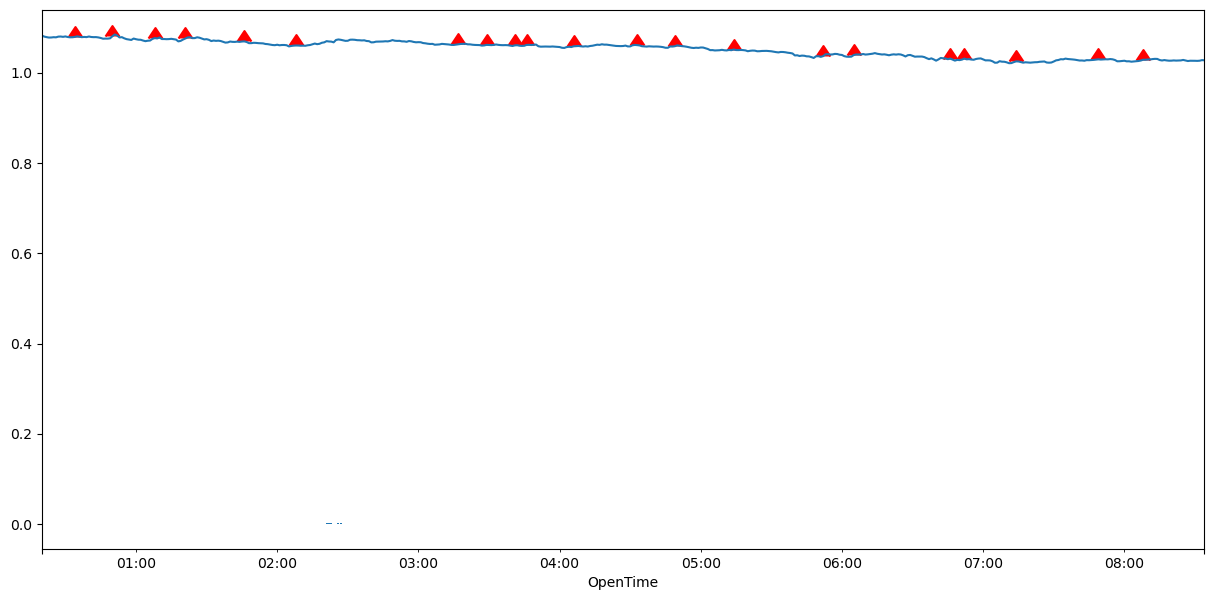

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
Ticker = 'JUP' #비트코인, 달러코인 페어
interval = '1m' # 1분봉
data=requests.get(f"https://fapi.binance.com/fapi/v1/markPriceKlines?symbol={Ticker}USDT&interval={interval}")
dic=json.loads(data.text)
df= pd.DataFrame(dic,columns=["OpenTime","Open","High","Low","Close","x","CloseTime","x2","x3","x3","x4","x5"])

df["OpenTime"] = pd.to_datetime(df['OpenTime'], unit='ms')
df.index = df["OpenTime"]
del df["OpenTime"]

using_case = pd.DataFrame(df["Close"])
using_case = using_case.astype('Float32')
#--------------------------------------------------------------------------------------------start
signal_i_list = []
signal_price_list = []
signal_return_list = []
signal_sell_list = []
sell_interval = 5
leverage = 5
trend = 1
k=2
short = 12 
long = 26
t = 9
#--------------------------------------------------------------------------------------------end
# Calculating EMA
using_case['ema_short'] = using_case['Close'].ewm(span=short, adjust=False).mean()
using_case['ema_long'] = using_case['Close'].ewm(span=long, adjust=False).mean()

# Calculating MACD and Signal line
using_case['MACD'] = using_case['ema_short'] - using_case['ema_long']
using_case['signal'] = using_case['MACD'].ewm(span=t, adjust=False).mean()

# Calculating MACD Histogram
using_case['macdhist'] = using_case['MACD'] - using_case['signal']
for i in range(1,len(using_case)):
    if i < 1 or i > len(using_case) - sell_interval:
        continue
    

    prev_price = using_case["Close"].iloc[i-1]
    current_price = using_case["Close"].iloc[i]
    직전_MACD_oscillator = using_case['macdhist'].iloc[i-1]
    당일_MACD_oscillator = using_case['macdhist'].iloc[i]


    if 직전_MACD_oscillator < 0 and 당일_MACD_oscillator >= 0:
        sell_date = using_case["Close"].iloc[i+sell_interval]
        수익률 = trend*(sell_date-current_price) / current_price*100*leverage
        print(f"  Signal 발생!  매수주가 {current_price:.0f}  ->  매도주가 {sell_date:.0f}  , 수익률 {수익률:.3f} %")
        #--------------------------------------------------------------------------------------------start
        signal_i_list.append(using_case.index[i])
        signal_price_list.append(current_price)
        signal_sell_list.append(sell_date)
        signal_return_list.append(수익률)
        #--------------------------------------------------------------------------------------------end
        print(i)


plt.figure(figsize=(20,10))
using_case["Close"][sell_interval:].plot(figsize=(15,7), label='price');
plt.bar(using_case['Close'].index, using_case['macdhist'])
plt.scatter(x=signal_i_list, y=signal_price_list, marker=10, color='red', s=100 , label='signal');